In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# CO2 data

The first dataset has been imported, the data is of Countries all over the world with their CO2 emission from year 1970-2021

**Why CO2 analysis**

CO2 emission data analysis is crucial for understanding and addressing climate change due to its central role in driving the Earth's warming and altering the global climate system. Carbon dioxide (CO2) is one of the most prevalent greenhouse gases, which trap heat in the atmosphere and contribute to the greenhouse effect.

In [3]:
#Importing data
data= pd.read_csv('/content/drive/MyDrive/Temperature data for Ireland/CO2_data.csv')

In [4]:
#view data
data.head()

Substance EDGAR Country Code                 Country        1970  \
0       CO2                ABW                   Aruba    0.081876   
1       CO2                AFG             Afghanistan    1.739541   
2       CO2                AGO                  Angola    8.952570   
3       CO2                AIA                Anguilla    0.002168   
4       CO2                AIR  International Aviation  169.300997   

         1971        1972        1973        1974        1975        1976  \
0    0.081889    0.095415    0.099630    0.089089    0.105139    0.096041   
1    1.737823    1.715749    1.742813    2.198551    2.037627    1.899895   
2    8.538308   10.388519   11.372301   11.833761   10.930423    7.317385   
3    0.002168    0.002264    0.002109    0.002350    0.002584    0.002434   
4  169.300997  179.147487  186.892096  179.793331  173.866020  174.273791   

   ...        2012        2013        2014        2015        2016  \
0  ...    1.618441    1.588689    1.615728    1.607879    1.578644   
1  ...   10.238064    8.484183    8.016290    8.361849    7.635914   
2  ...   24.186843   27.822325   30.407844   32.594130   30.691660   
3  ...    0.026023    0.027941    0.027896    0.028005    0.028340   
4  ...  472.721119  480.909126  496.627697  524.654034  548.207777   

         2017        2018        2019        2020        2021  
0    1.315458    1.347594    1.387156    1.144333    1.274134  
1    8.145255    9.106997    8.082724    8.183718    8.347669  
2   26.129882   24.048619   25.325994   23.055844   24.450057  
3    0.029062    0.028223    0.027580    0.022779    0.025409  
4  582.230490  609.630469  617.763229  338.144083  390.166250  

[5 rows x 55 columns]

From data we can see that Substance and Edgar Country code are not that useful variables, hence we will drop them

In [5]:
# Drop the "Substance" and "EDGAR Country Code" columns
columns_to_drop = ["Substance", "EDGAR Country Code"]
data = data.drop(columns=columns_to_drop, axis=1)

data.head()

Country        1970        1971        1972        1973  \
0                   Aruba    0.081876    0.081889    0.095415    0.099630   
1             Afghanistan    1.739541    1.737823    1.715749    1.742813   
2                  Angola    8.952570    8.538308   10.388519   11.372301   
3                Anguilla    0.002168    0.002168    0.002264    0.002109   
4  International Aviation  169.300997  169.300997  179.147487  186.892096   

         1974        1975        1976        1977        1978  ...  \
0    0.089089    0.105139    0.096041    0.105305    0.106662  ...   
1    2.198551    2.037627    1.899895    2.288853    1.940763  ...   
2   11.833761   10.930423    7.317385   12.057774   14.239234  ...   
3    0.002350    0.002584    0.002434    0.002537    0.002902  ...   
4  179.793331  173.866020  174.273791  190.068978  197.222628  ...   

         2012        2013        2014        2015        2016        2017  \
0    1.618441    1.588689    1.615728    1.607879    1.578644    1.315458   
1   10.238064    8.484183    8.016290    8.361849    7.635914    8.145255   
2   24.186843   27.822325   30.407844   32.594130   30.691660   26.129882   
3    0.026023    0.027941    0.027896    0.028005    0.028340    0.029062   
4  472.721119  480.909126  496.627697  524.654034  548.207777  582.230490   

         2018        2019        2020        2021  
0    1.347594    1.387156    1.144333    1.274134  
1    9.106997    8.082724    8.183718    8.347669  
2   24.048619   25.325994   23.055844   24.450057  
3    0.028223    0.027580    0.022779    0.025409  
4  609.630469  617.763229  338.144083  390.166250  

[5 rows x 53 columns]

As the data is in horizontal formate, we will convert it in vertical format, so that we can have year as one variable, with CO2 of each country

In [6]:
# Melt the data to reshape it
data = pd.melt(data, id_vars=['Country'], var_name='Year', value_name='CO2 Emissions')

# Display the resulting dataset
data.head()

Country  Year  CO2 Emissions
0                   Aruba  1970       0.081876
1             Afghanistan  1970       1.739541
2                  Angola  1970       8.952570
3                Anguilla  1970       0.002168
4  International Aviation  1970     169.300997

In [7]:
#every country in dataset
data['Country'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla',
       'International Aviation', 'Albania', 'Curaçao',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland and Liechtenstein', 'Chile', 'China',
       'Côte d’Ivoire', 'Cameroon', 'Democratic Republic of the Congo',
       'Congo', 'Cook Islands', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara',
       'Spain and Andorra', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
      

In [8]:
#find null values
data.isna().sum()

Country          52
Year              0
CO2 Emissions    52
dtype: int64

As there are NA values and there are two countries which do not make sense, hence we will drop them

In [9]:
# Drop rows with NaN values in 'Country' column
data = data.dropna(subset=['Country'])

# List of country names to be removed
countries_to_remove = ['EU27', 'GLOBAL TOTAL']

# Filter out rows with specific country names
data = data[~data['Country'].isin(countries_to_remove)]

### Adding Coordinates

For better visualization, we will add coordinates of countries

In [10]:
# Define the coordinates for the locations
coordinates = {
    "Aruba": (12.5211, -69.9683),
    "Afghanistan": (33.9391, 67.7100),
    "Angola": (-11.2027, 17.8739),
    "Anguilla": (18.2206, -63.0686),
    "International Aviation": (30.3984, -87.4548),
    "Albania": (41.1533, 20.1683),
    "Curaçao": (12.1696, -68.9900),
    "United Arab Emirates": (23.4241, 53.8478),
    "Argentina": (-38.4161, -63.6167),
    "Armenia": (40.0691, 45.0382),
    "Antigua and Barbuda": (17.0608, -61.7964),
    "Australia": (-25.2744, 133.7751),
    "Austria": (47.5162, 14.5501),
    "Azerbaijan": (40.1431, 47.5769),
    "Burundi": (-3.3731, 29.9189),
    "Belgium": (50.8503, 4.3517),
    "Benin": (9.3077, 2.3158),
    "Burkina Faso": (12.2383, -1.5616),
    "Bangladesh": (23.6850, 90.3563),
    "Bulgaria": (42.7339, 25.4858),
    "Bahrain": (25.9304, 50.6378),
    "Bahamas": (25.0343, -77.3963),
    "Bosnia and Herzegovina": (43.9159, 17.6791),
    "Belarus": (53.7098, 27.9534),
    "Belize": (17.1899, -88.4976),
    "Bermuda": (32.3078, -64.7505),
    "Bolivia": (-16.2902, -63.5887),
    "Brazil": (-14.2350, -51.9253),
    "Barbados": (13.1939, -59.5432),
    "Brunei": (4.5353, 114.7277),
    "Bhutan": (27.5142, 90.4336),
    "Botswana": (-22.3285, 24.6849),
    "Central African Republic": (6.6111, 20.9394),
    "Canada": (56.1304, -106.3468),
    "Switzerland and Liechtenstein": (46.8182, 8.2275),
    "Chile": (-35.6751, -71.5430),
    "China": (35.8617, 104.1954),
    "Côte d’Ivoire": (7.5399, -5.5471),
    "Cameroon": (3.8480, 11.5021),
    "Democratic Republic of the Congo": (-4.0383, 21.7587),
    "Congo": (-0.2280, 15.8277),
    "Cook Islands": (-21.2367, -159.7777),
    "Colombia": (4.5709, -74.2973),
    "Comoros": (-11.8750, 43.8722),
    "Cabo Verde": (16.5388, -23.0418),
    "Costa Rica": (9.7489, -83.7534),
    "Cuba": (21.5218, -77.7812),
    "Cayman Islands": (19.3133, -81.2546),
    "Cyprus": (35.1264, 33.4299),
    "Czechia": (49.8175, 15.4730),
    "Germany": (51.1657, 10.4515),
    "Djibouti": (11.8251, 42.5903),
    "Dominica": (15.4150, -61.3710),
    "Denmark": (56.2639, 9.5018),
    "Dominican Republic": (18.7357, -70.1627),
    "Algeria": (28.0339, 1.6596),
    "Ecuador": (-1.8312, -78.1834),
    "Egypt": (26.8206, 30.8025),
    "Eritrea": (15.1794, 39.7823),
    "Western Sahara": (24.2155, -12.8858),
    "Spain and Andorra": (40.4637, -3.7492),
    "Estonia": (58.5953, 25.0136),
    "Ethiopia": (9.1450, 40.4897),
    "Finland": (61.9241, 25.7482),
    "Fiji": (-17.7134, 178.0650),
    "Falkland Islands": (-51.7963, -59.5236),
    "France and Monaco": (46.6034, 1.8883),
    "Faroes": (61.8926, -6.9118),
    "Gabon": (-0.8037, 11.6094),
    "United Kingdom": (55.3781, -3.4360),
    "Georgia": (42.3154, 43.3569),
    "Ghana": (7.9465, -1.0232),
    "Gibraltar": (36.1408, -5.3536),
    "Guinea": (9.9456, -9.6966),
    "Guadeloupe": (16.2650, -61.5510),
    "The Gambia": (13.4432, -15.3101),
    "Guinea-Bissau": (11.8037, -15.1804),
    "Equatorial Guinea": (1.6508, 10.2679),
    "Greece": (39.0742, 21.8243),
    "Grenada": (12.2628, -61.6042),
    "Greenland": (71.7069, -42.6043),
    "Guatemala": (15.7835, -90.2308),
    "French Guiana": (3.9339, -53.1258),
    "Guyana": (4.8604, -58.9302),
    "Hong Kong": (22.3193, 114.1694),
    "Honduras": (15.2000, -86.2419),
    "Croatia": (45.1000, 15.2000),
    "Haiti": (18.9712, -72.2852),
    "Hungary": (47.1625, 19.5033),
    "Indonesia": (-0.7893, 113.9213),
    "India": (20.5937, 78.9629),
    "Ireland": (53.1424, -7.6921),
    "Iran": (32.4279, 53.6880),
    "Iraq": (33.2232, 43.6793),
    "Iceland": (64.9631, -19.0208),
    "Israel and Palestine, State of": (31.0461, 34.8516),
    "Italy, San Marino and the Holy See": (41.8719, 12.5675),
    "Jamaica": (18.1096, -77.2975),
    "Jordan": (30.5852, 36.2384),
    "Japan": (36.2048, 138.2529),
    "Kazakhstan": (48.0196, 66.9237),
    "Kenya": (-0.0236, 37.9062),
    "Kyrgyzstan": (41.2044, 74.7661),
    "Cambodia": (12.5657, 104.9910),
    "Kiribati": (-3.3704, -168.7340),
    "Saint Kitts and Nevis": (17.3578, -62.7822),
    "South Korea": (35.9078, 127.7669),
    "Kuwait": (29.3759, 47.9774),
    "Laos": (19.8563, 102.4955),
    "Lebanon": (33.8547, 35.8623),
    "Liberia": (6.4281, -9.4295),
    "Libya": (26.3351, 17.2283),
    "Saint Lucia": (13.9094, -60.9789),
    "Sri Lanka": (7.8731, 80.7718),
    "Lesotho": (-29.609988, 28.233608),
    "Lithuania": (55.1694, 23.8813),
    "Luxembourg": (49.8153, 6.1296),
    "Latvia": (56.8796, 24.6032),
    "Macao": (22.1987, 113.5439),
    "Morocco": (31.7917, -7.0926),
    "Moldova": (47.4116, 28.3699),
    "Madagascar": (-18.7669, 46.8691),
    "Maldives": (3.2028, 73.2207),
    "Mexico": (23.6345, -102.5528),
    "North Macedonia": (41.6086, 21.7453),
    "Mali": (17.5707, -3.9962),
    "Malta": (35.9375, 14.3754),
    "Myanmar/Burma": (21.9162, 95.9560),
    "Mongolia": (46.8625, 103.8467),
    "Mozambique": (-18.6657, 35.5296),
    "Mauritania": (21.0079, -10.9408),
    "Martinique": (14.6415, -61.0242),
    "Mauritius": (-20.348404, 57.552152),
    "Malawi": (-13.254308, 34.301525),
    "Malaysia": (4.2105, 101.9758),
    "Namibia": (-22.9576, 18.4904),
    "New Caledonia": (-20.9043, 165.6180),
    "Niger": (17.6078, 8.0817),
    "Nigeria": (9.0820, 8.6753),
    "Nicaragua": (12.8654, -85.2072),
    "Netherlands": (52.1326, 5.2913),
    "Norway": (60.4720, 8.4689),
    "Nepal": (28.3949, 84.1240),
    "New Zealand": (-40.9006, 174.8860),
    "Oman": (21.5126, 55.9233),
    "Pakistan": (30.3753, 69.3451),
    "Panama": (8.5380, -80.7821),
    "Peru": (-9.1900, -75.0152),
    "Philippines": (12.8797, 121.7740),
    "Palau": (7.5149, 134.5825),
    "Papua New Guinea": (-6.314993, 143.955550),
    "Poland": (51.9194, 19.1451),
    "Puerto Rico": (18.2208, -66.5901),
    "North Korea": (40.3399, 127.5101),
    "Portugal": (39.3999, -8.2245),
    "Paraguay": (-23.4425, -58.4438),
    "French Polynesia": (-17.6797, -149.4068),
    "Qatar": (25.3548, 51.1839),
    "Réunion": (-21.1151, 55.5364),
    "Romania": (45.9432, 24.9668),
    "Russia": (61.5240, 105.3188),
    "Rwanda": (-1.9403, 29.8739),
    "Saudi Arabia": (23.8859, 45.0792),
    "Serbia and Montenegro": (44.0165, 21.0059),
    "Sudan and South Sudan": (12.8628, 30.2176),
    "International Shipping": (0.0, 0.0),
    "Senegal": (14.4974, -14.4524),
    "Singapore": (1.3521, 103.8198),
    "Saint Helena, Ascension and Tristan da Cunha": (-15.9654, -5.7089),
    "Solomon Islands": (-9.744036, 160.075952),
    "Sierra Leone": (8.4606, -11.7799),
    "El Salvador": (13.7942, -88.8965),
    "Somalia": (5.1521, 46.1996),
    "Saint Pierre and Miquelon": (46.8852, -56.3159),
    "São Tomé and Príncipe": (0.1864, 6.6131),
    "Suriname": (3.9193, -56.0278),
    "Slovakia": (48.6690, 19.6990),
    "Slovenia": (46.1512, 14.9955),
    "Sweden": (60.1282, 18.6435),
    "Eswatini": (-26.5225, 31.4659),
    "Seychelles": (-4.6796, 55.4919),
    "Syria": (34.8021, 38.9968),
    "Turks and Caicos Islands": (21.6940, -71.7979),
    "Chad": (15.4542, 18.7322),
    "Togo": (8.6195, 0.8248),
    "Thailand": (15.8700, 100.9925),
    "Tajikistan": (38.8610, 71.2761),
    "Turkmenistan": (38.9697, 59.5563),
    "Timor-Leste": (-8.8742, 125.7275),
    "Tonga": (-21.1789, -175.1982),
    "Trinidad and Tobago": (10.6918, -61.2225),
    "Tunisia": (33.8869, 9.5375),
    "Turkey": (38.9637, 35.2433),
    "Taiwan": (23.6978, 120.9605),
    "Tanzania": (-6.369028, 34.888822),
    "Uganda": (1.3733, 32.2903),
    "Ukraine": (48.3794, 31.1656),
    "Uruguay": (-32.5228, -55.7658),
    "United States": (37.0902, -95.7129),
    "Uzbekistan": (41.3775, 64.5853),
    "Saint Vincent and the Grenadines": (12.9843, -61.2872),
    "Venezuela": (6.4238, -66.5897),
    "British Virgin Islands": (18.4207, -64.6399),
    "Vietnam": (14.0583, 108.2772),
    "Vanuatu": (-15.3767, 166.9592),
    "Samoa": (-13.7590, -172.1046),
    "Yemen": (15.5527, 48.5164),
    "South Africa": (-30.5595, 22.9375),
    "Zambia": (-13.1339, 27.8493),
    "Zimbabwe": (-19.0154, 29.1549)
}

# Create latitude and longitude columns using the coordinates
data["Latitude"] = data["Country"].map(lambda country: coordinates.get(country, (None, None))[0])
data["Longitude"] = data["Country"].map(lambda country: coordinates.get(country, (None, None))[1])

# Print the resulting DataFrame
print(data)

                      Country  Year  CO2 Emissions  Latitude  Longitude
0                       Aruba  1970       0.081876   12.5211   -69.9683
1                 Afghanistan  1970       1.739541   33.9391    67.7100
2                      Angola  1970       8.952570  -11.2027    17.8739
3                    Anguilla  1970       0.002168   18.2206   -63.0686
4      International Aviation  1970     169.300997   30.3984   -87.4548
...                       ...   ...            ...       ...        ...
11068                   Samoa  2021       0.360230  -13.7590  -172.1046
11069                   Yemen  2021      12.047245   15.5527    48.5164
11070            South Africa  2021     435.522812  -30.5595    22.9375
11071                  Zambia  2021       7.010965  -13.1339    27.8493
11072                Zimbabwe  2021      12.293227  -19.0154    29.1549

[10920 rows x 5 columns]


Visualizing the countries which are in data

In [11]:
# Create the Scattergeo plot using Plotly Graph Objects
fig = go.Figure(go.Scattergeo(
    lon = data["Longitude"],
    lat = data["Latitude"],
    text = data["Country"],
    mode = "markers"
))

# Update geos and layout settings
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

In [12]:
# Create the Scattergeo plot using Plotly Graph Objects
fig = go.Figure(go.Scattergeo(
    lon = data["Longitude"],
    lat = data["Latitude"],
    text = data["Country"],
    mode = "markers",
    marker=dict(
        color='violet',   # Change the color of the dots to red
        size=8        # Set the size of the dots
    )
))

# Update geos and layout settings
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

### Adding Continent

We will add continents aswell

In [13]:
# Create a mapping of countries to continents
country_to_continent = {
    "Aruba": "North America",
    "Afghanistan": "Asia",
    "Angola": "Africa",
    "Anguilla": "North America",
    "International Aviation": "International",
    "Albania": "Europe",
    "Curaçao": "North America",
    "United Arab Emirates": "Asia",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Antigua and Barbuda": "North America",
    "Australia": "Australia",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Burundi": "Africa",
    "Belgium": "Europe",
    "Benin": "Africa",
    "Burkina Faso": "Africa",
    "Bangladesh": "Asia",
    "Bulgaria": "Europe",
    "Bahrain": "Asia",
    "Bahamas": "North America",
    "Bosnia and Herzegovina": "Europe",
    "Belarus": "Europe",
    "Belize": "North America",
    "Bermuda": "North America",
    "Bolivia": "South America",
    "Brazil": "South America",
    "Barbados": "North America",
    "Brunei": "Asia",
    "Bhutan": "Asia",
    "Botswana": "Africa",
    "Central African Republic": "Africa",
    "Canada": "North America",
    "Switzerland and Liechtenstein": "Europe",
    "Chile": "South America",
    "China": "Asia",
    "Côte d’Ivoire": "Africa",
    "Cameroon": "Africa",
    "Democratic Republic of the Congo": "Africa",
    "Congo": "Africa",
    "Cook Islands": "Australia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Cabo Verde": "Africa",
    "Costa Rica": "North America",
    "Cuba": "North America",
    "Cayman Islands": "North America",
    "Cyprus": "Europe",
    "Czechia": "Europe",
    "Germany": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Denmark": "Europe",
    "Dominican Republic": "North America",
    "Algeria": "Africa",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "Eritrea": "Africa",
    "Western Sahara": "Africa",
    "Spain and Andorra": "Europe",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Finland": "Europe",
    "Fiji": "Australia",
    "Falkland Islands": "South America",
    "France and Monaco": "Europe",
    "Faroes": "Europe",
    "Gabon": "Africa",
    "United Kingdom": "Europe",
    "Georgia": "Asia",
    "Ghana": "Africa",
    "Gibraltar": "Europe",
    "Guinea": "Africa",
    "Guadeloupe": "North America",
    "The Gambia": "Africa",
    "Guinea-Bissau": "Africa",
    "Equatorial Guinea": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Greenland": "North America",
    "Guatemala": "North America",
    "French Guiana": "South America",
    "Guyana": "South America",
    "Hong Kong": "Asia",
    "Honduras": "North America",
    "Croatia": "Europe",
    "Haiti": "North America",
    "Hungary": "Europe",
    "Indonesia": "Asia",
    "India": "Asia",
    "Ireland": "Europe",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Iceland": "Europe",
    "Israel and Palestine, State of": "Asia",
    "Italy, San Marino and the Holy See": "Europe",
    "Jamaica": "North America",
    "Jordan": "Asia",
    "Japan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kyrgyzstan": "Asia",
    "Cambodia": "Asia",
    "Kiribati": "Australia",
    "Saint Kitts and Nevis": "North America",
    "South Korea": "Asia",
    "Kuwait": "Asia",
    "Laos": "Asia",
    "Lebanon": "Asia",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Saint Lucia": "North America",
    "Sri Lanka": "Asia",
    "Lesotho": "Africa",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Latvia": "Europe",
    "Macao": "Asia",
    "Morocco": "Africa",
    "Moldova": "Europe",
    "Madagascar": "Africa",
    "Maldives": "Asia",
    "Mexico": "North America",
    "North Macedonia": "Europe",
    "Mali": "Africa",
    "Malta": "Europe",
    "Myanmar/Burma": "Asia",
    "Mongolia": "Asia",
    "Mozambique": "Africa",
    "Mauritania": "Africa",
    "Martinique": "North America",
    "Mauritius": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Namibia": "Africa",
    "New Caledonia": "Australia",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Nicaragua": "North America",
    "Netherlands": "Europe",
    "Norway": "Europe",
    "Nepal": "Asia",
    "New Zealand": "Australia",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Panama": "North America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Palau": "Australia",
    "Papua New Guinea": "Australia",
    "Poland": "Europe",
    "Puerto Rico": "North America",
    "North Korea": "Asia",
    "Portugal": "Europe",
    "Paraguay": "South America",
    "French Polynesia": "Australia",
    "Qatar": "Asia",
    "Réunion": "Africa",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saudi Arabia": "Asia",
    "Serbia and Montenegro": "Europe",
    "Sudan and South Sudan": "Africa",
    "International Shipping": "International",
    "Senegal": "Africa",
    "Singapore": "Asia",
    "Saint Helena, Ascension and Tristan da Cunha": "Africa",
    "Solomon Islands": "Australia",
    "Sierra Leone": "Africa",
    "El Salvador": "North America",
    "Somalia": "Africa",
    "Saint Pierre and Miquelon": "North America",
    "São Tomé and Príncipe": "Africa",
    "Suriname": "South America",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Sweden": "Europe",
    "Eswatini": "Africa",
    "Seychelles": "Africa",
    "Syria": "Asia",
    "Turks and Caicos Islands": "North America",
    "Chad": "Africa",
    "Togo": "Africa",
    "Thailand": "Asia",
    "Tajikistan": "Asia",
    "Turkmenistan": "Asia",
    "Timor-Leste": "Asia",
    "Tonga": "Australia",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Taiwan": "Asia",
    "Tanzania": "Africa",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "Uruguay": "South America",
    "United States": "North America",
    "Uzbekistan": "Asia",
    "Saint Vincent and the Grenadines": "North America",
    "Venezuela": "South America",
    "British Virgin Islands": "North America",
    "Vietnam": "Asia",
    "Vanuatu": "Australia",
    "Samoa": "Australia",
    "Yemen": "Asia",
    "South Africa": "Africa",
    "Zambia": "Africa",
    "Zimbabwe": "Africa"
}

# Delete rows for "Georgia" and "International Shipping"
data = data[~data['Country'].isin(["Georgia", "International Shipping",'International Aviation'])]

# Categorize countries into continents based on the mapping
data['Continent'] = data['Country'].map(country_to_continent)

# Create the Plotly scattermapbox plot
fig = go.Figure()

# Loop through unique continents and add scattermapbox traces for each
for continent in data['Continent'].unique():
    continent_data = data[data['Continent'] == continent]
    fig.add_trace(go.Scattermapbox(
        lat=continent_data['Latitude'],
        lon=continent_data['Longitude'],
        mode='markers+text',
        marker=dict(size=12),
        text=continent_data['Country'],
        name=continent,  # Display legend for each continent
        textposition='top center',
        hoverinfo='text'
    ))

# Set the map layout
fig.update_layout(
    title='CO2 Data Locations by Continent',
    mapbox_style='carto-darkmatter',
    mapbox=dict(
        center=dict(lat=0, lon=0),
        zoom=1
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()


<ipython-input-13-4c24403f2a30>:219: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
# Categorize countries into continents based on the mapping
data['Continent'] = data['Country'].map(country_to_continent)

# Create the 3D scattergeo plot on a globe
fig = go.Figure()

# Loop through unique continents and add scattergeo traces for each
for continent in data['Continent'].unique():
    continent_data = data[data['Continent'] == continent]
    fig.add_trace(go.Scattergeo(
        lat=continent_data['Latitude'],
        lon=continent_data['Longitude'],
        mode='markers',
        marker=dict(size=12),
        text=continent_data['Country'],  # Set the country name for hover text
        hoverinfo='text',  # Display only the text on hover
        name=continent,
    ))

# Set the plot layout
fig.update_layout(
    title='CO2 Data Locations by Continent on Globe',
    geo=dict(
        projection_type="orthographic",
        showcoastlines=True,
        showland=True,
        landcolor="black",
        oceancolor="black",
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()

### Continent wise CO2 value over the years

**Data Analysis**

We will observe how there is change in CO2 emission over the years all over the world

In [15]:
# Filter dataset for north american countries
df_region_northamerica = data[data['Continent'] == 'North America']

# Create the grouped bar chart using Plotly Express
fig = px.bar(data_frame=df_region_northamerica,
             x='Country',
             y='CO2 Emissions',
             color='Country',
             barmode='group',
             orientation='v',
             title='CO2 Emissions in North American Countries (1970-2021)',
             animation_frame='Year',
             template='plotly_dark',
             text='CO2 Emissions'
            )

# Customize the layout and appearance
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', width=0.4)

# Show the grouped bar chart
fig.show()

**North America**

For north america continent; Canada, United states have highest emission from 1970, and it is increasing. In 2021 with Canada, United States, mexico also have highest CO2 emission

In [16]:
# Filter dataset for Asian countries
df_region_asia = data[data['Continent'] == 'Asia']

# Create the grouped bar chart using Plotly Express
fig = px.bar(data_frame=df_region_asia,
             x='Country',
             y='CO2 Emissions',
             color='Country',
             barmode='group',
             orientation='v',
             title='CO2 Emissions in Asian Countries (1970-2021)',
             animation_frame='Year',
             template='plotly_dark',
             text='CO2 Emissions'
            )

# Customize the layout and appearance
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', width=0.4)

# Show the grouped bar chart
fig.show()

**Asia**

At the begining 1970, China and Japan have highest emission, but as time passes, Japan has made progress by reducing the emission over years, but emission of India has been increased.

In [17]:
# Filter dataset for African countries
df_region_africa = data[data['Continent'] == 'Africa']

# Create the grouped bar chart using Plotly Express
fig = px.bar(data_frame=df_region_africa,
             x='Country',
             y='CO2 Emissions',
             color='Country',
             barmode='group',
             orientation='v',
             title='CO2 Emissions in African Countries (1970-2021)',
             animation_frame='Year',
             template='plotly_dark',
             text='CO2 Emissions'
            )

# Customize the layout and appearance
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', width=0.4)

# Show the grouped bar chart
fig.show()

**Africa**

From 1970-2021 Algeria, Egypt, nigieria and south africa have been highest countries with CO2 emission

In [18]:
# Filter dataset for european countries
df_region_europe = data[data['Continent'] == 'Europe']

# Create the grouped bar chart using Plotly Express
fig = px.bar(data_frame=df_region_europe,
             x='Country',
             y='CO2 Emissions',
             color='Country',
             barmode='group',
             orientation='v',
             title='CO2 Emissions in European Countries (1970-2021)',
             animation_frame='Year',
             template='plotly_dark',
             text='CO2 Emissions'
            )

# Customize the layout and appearance
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', width=0.4)

# Show the grouped bar chart
fig.show()

**Europe**

The CO2 emission of Germany, United Kingdom,France, Italy, Turkey, Russia and Ukraine is highest, and it has been fluctuating over the years

In [19]:
# Filter dataset for south america countries
df_region_southamerica = data[data['Continent'] == 'South America']

# Create the grouped bar chart using Plotly Express
fig = px.bar(data_frame=df_region_southamerica,
             x='Country',
             y='CO2 Emissions',
             color='Country',
             barmode='group',
             orientation='v',
             title='CO2 Emissions in South American Countries (1970-2021)',
             animation_frame='Year',
             template='plotly_dark',
             text='CO2 Emissions'
            )

# Customize the layout and appearance
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', width=0.4)

# Show the grouped bar chart
fig.show()

**South America**

Argentina, Brail, Venezuela, Chile are the countries with highest CO2 emission

In [20]:
# Filter dataset for Australian countries
df_region_australia = data[data['Continent'] == 'Australia']

# Create the grouped bar chart using Plotly Express
fig = px.bar(data_frame=df_region_australia,
             x='Country',
             y='CO2 Emissions',
             color='Country',
             barmode='group',
             orientation='v',
             title='CO2 Emissions in Australia Countries (1970-2021)',
             animation_frame='Year',
             template='plotly_dark',
             text='CO2 Emissions'
            )

# Customize the layout and appearance
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', width=0.4)

# Show the grouped bar chart
fig.show()

**Australia**

Australia and new zealand are the countries with highest CO2 emission value

### Only Choosing Countries with Higest CO2 value

In [21]:
# Selected the countries of interest
countries_of_interest = [
    "Argentina", "Brazil", "Venezuela", "Chile", "Germany", "United Kingdom",
    "France", "Italy", "Turkey", "Russia", "Ukraine", "Algeria", "Egypt",
    "Nigeria", "South Africa", "China", "India", "Japan", "Canada", "United States",
    "Mexico", "Australia", "New Zealand"
]

# Filter the dataset for the selected countries
df_selected = data[data['Country'].isin(countries_of_interest)]

# Apply logarithmic transformation to the 'CO2 Emissions' column
df_selected['CO2 Emissions'] = np.log(df_selected['CO2 Emissions'])

# Create the line plot using Plotly Express
fig = px.line(
    df_selected,
    x='Year',
    y='CO2 Emissions',
    color='Country',
    title='CO2 Emissions Over Years for Selected Countries',
    labels={'CO2 Emissions': 'CO2 Emissions (metric tons per capita)'},
    template='plotly_dark'
)

# Show the plot
fig.show()



<ipython-input-21-3f8f1165fca8>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Plotting top 23 countries, with log for better understanding.


1.   Emission of China has increased tremendously over the years, it was the 4th top country in 1970 but now in 2021 its on top
2.   United states have been consistant with their CO2 levels.
3.   Emission of India has also been increased quite tremendously over the years
4.   Emission of Russia has also been same.
5.   As before, Japan havent decreased their CO2 emission that much.
6.   Whereas, Germany made some progress by decreasing emission value




Top 5 countries in 2021

In [22]:
# Convert 'Year' column to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
# Filter the data for the year 2021
data_2021 = data[data['Year'] == 2021]

# Sort the data based on CO2 emissions in descending order
sorted_data = data_2021.sort_values(by='CO2 Emissions', ascending=False)

# Print the top 10 countries with highest CO2 emissions in 2021
sorted_data.head()

Country  Year  CO2 Emissions  Latitude  Longitude      Continent
10899          China  2021   12466.315980   35.8617   104.1954           Asia
11061  United States  2021    4752.079320   37.0902   -95.7129  North America
10953          India  2021    2648.779133   20.5937    78.9629           Asia
11023         Russia  2021    1942.535227   61.5240   105.3188         Europe
10962          Japan  2021    1084.690992   36.2048   138.2529           Asia

Top 5 countries in 1970

In [23]:
# Filter the data for the year 2021
data_1970 = data[data['Year'] == 1970]

# Sort the data based on CO2 emissions in descending order
sorted_data1 = data_1970.sort_values(by='CO2 Emissions', ascending=False)

# Print the top 10 countries with highest CO2 emissions in 2021
sorted_data1.head()

Country  Year  CO2 Emissions  Latitude  Longitude      Continent
198  United States  1970    4693.300240   37.0902   -95.7129  North America
160         Russia  1970    1538.444931   61.5240   105.3188         Europe
50         Germany  1970    1084.251361   51.1657    10.4515         Europe
36           China  1970     909.572598   35.8617   104.1954           Asia
99           Japan  1970     857.089284   36.2048   138.2529           Asia

As mentioned earlier, Germany was in top5 in 1970, but in 2021 they have decresed their value of CO2 emission.

For further analysis we will choose 6 countries which have been on top in 1970 and in 2021



In [24]:
# List of selected countries
selected_countries = ['China', 'Japan', 'Germany', 'United States', 'Russia', 'India']

# Filter the population_data DataFrame for selected countries
filtered_data = data[data['Country'].isin(selected_countries)]

# Print the filtered data
filtered_data.head(10)

Country  Year  CO2 Emissions  Latitude  Longitude      Continent
36           China  1970     909.572598   35.8617   104.1954           Asia
50         Germany  1970    1084.251361   51.1657    10.4515         Europe
90           India  1970     214.497832   20.5937    78.9629           Asia
99           Japan  1970     857.089284   36.2048   138.2529           Asia
160         Russia  1970    1538.444931   61.5240   105.3188         Europe
198  United States  1970    4693.300240   37.0902   -95.7129  North America
249          China  1971     913.439385   35.8617   104.1954           Asia
263        Germany  1971    1078.567837   51.1657    10.4515         Europe
303          India  1971     215.520618   20.5937    78.9629           Asia
312          Japan  1971     854.232595   36.2048   138.2529           Asia

In [25]:
import pandas as pd
from scipy.stats import pearsonr


# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(filtered_data["Year"], filtered_data["CO2 Emissions"])

# Significance level
alpha = 0.05

# Print results
print("Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

# Conduct hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between Year and CO2 Emissions.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Year and CO2 Emissions.")


Correlation Coefficient: 0.30321545715412945
P-value: 4.668046977967945e-08
Reject the null hypothesis: There is a significant correlation between Year and CO2 Emissions.


Now we will add Population data for same years, to see if there is increase in CO2 value as population increases

# Population

In [26]:
population = pd.read_csv('/content/drive/MyDrive/Temperature data for Ireland/population-and-demography.csv')
population.head()

Country name  Year  Population
0  Afghanistan  1950     7480464
1  Afghanistan  1951     7571542
2  Afghanistan  1952     7667534
3  Afghanistan  1953     7764549
4  Afghanistan  1954     7864289

Add only from 1970

In [27]:
# Filter data for years from 1970 and later
population_data = population[population['Year'] >= 1970]
population_data.head()

Country name  Year  Population
20  Afghanistan  1970    10752973
21  Afghanistan  1971    11015853
22  Afghanistan  1972    11286753
23  Afghanistan  1973    11575308
24  Afghanistan  1974    11869881

Only countries which are there in CO2 dataset

In [28]:
# Extract unique countries from CO2 emission dataset
unique_countries = data['Country'].unique()

# Filter population dataset to retain only countries present in CO2 emission dataset
population_data = population_data[population_data['Country name'].isin(unique_countries)]

# Reset index
population_data.reset_index(drop=True, inplace=True)

population_data.head()


Country name  Year  Population
0  Afghanistan  1970    10752973
1  Afghanistan  1971    11015853
2  Afghanistan  1972    11286753
3  Afghanistan  1973    11575308
4  Afghanistan  1974    11869881

Population in 1970

In [29]:
# Filter data for the year 1970
population_1970 = population_data[population_data["Year"] == 1970]

# Take the logarithm of the population
population_1970["Log_Population"] = np.log(population_1970["Population"])

# Plot a world map using Plotly Express
fig = px.choropleth(
    population_1970,
    locations="Country name",
    locationmode="country names",
    color="Log_Population",
    color_continuous_scale="Viridis",
    hover_name="Country name",
    title="Logarithmic Population for the Year 1970"
)

fig.show()


<ipython-input-29-d3d9145b32e0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



China and India had highest population

World population in 2021

In [30]:
# Filter data for the year 1970
population_2021 = population_data[population_data["Year"] == 2021]

# Take the logarithm of the population
population_2021["Log_Population"] = np.log(population_2021["Population"])

# Plot a world map using Plotly Express
fig = px.choropleth(
    population_2021,
    locations="Country name",
    locationmode="country names",
    color="Log_Population",
    color_continuous_scale="Viridis",
    hover_name="Country name",
    title="Population for the Year 2021"
)

fig.show()


<ipython-input-30-64533b2b335e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
# Select only the required countries
selected_countries = ['China', 'Japan', 'Germany', 'United States', 'Russia', 'India']
filtered_data1 = population_data[population_data['Country name'].isin(selected_countries)]

# Apply logarithm to the population values
filtered_data1['Log Population'] = np.log(filtered_data1['Population'])

# Create a line plot using Plotly Express with log-scaled population
fig = px.line(filtered_data1, x='Year', y='Log Population', color='Country name', title='Log Population Trends')
fig.show()


<ipython-input-31-48611502e263>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
filtered_data1.head()

Country name  Year  Population  Log Population
1976        China  1970   822534460       20.527901
1977        China  1971   843285440       20.552816
1978        China  1972   862840400       20.575740
1979        China  1973   881652100       20.597308
1980        China  1974   899367700       20.617203

In [33]:
# Merge the two DataFrames based on "Country" and "Year"
final_data = pd.merge(filtered_data, filtered_data1, left_on=['Country', 'Year'], right_on=['Country name', 'Year'])

# Drop the redundant "Country name" column
final_data = final_data.drop(columns=['Country name'])

# Reset the index of the combined DataFrame
final_data.reset_index(drop=True, inplace=True)

# Print the combined_data DataFrame
final_data.head()


Country  Year  CO2 Emissions  Latitude  Longitude Continent  Population  \
0    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
1  Germany  1970    1084.251361   51.1657    10.4515    Europe    78294590   
2    India  1970     214.497832   20.5937    78.9629      Asia   557501300   
3    Japan  1970     857.089284   36.2048   138.2529      Asia   105416840   
4   Russia  1970    1538.444931   61.5240   105.3188    Europe   130093010   

   Log Population  
0       20.527901  
1       18.175989  
2       20.138975  
3       18.473433  
4       18.683760

In [34]:
# List of countries to create individual plots for
countries_to_plot = ['China', 'Germany', 'India', 'Japan', 'Russia','United States']

# Define common layout settings
layout_settings = {
    'title_font_size': 16,
    'xaxis_title': 'Log Population',
    'yaxis_title': 'Log CO2 Emissions',
    'font_size': 12,
}

# Define a color scale for each country
color_scale = px.colors.qualitative.Set1

# Loop through the countries and create individual scatter plots
for i, country in enumerate(countries_to_plot):
    country_data = final_data[final_data['Country'] == country]
    fig = px.scatter(
        country_data,
        x='Log Population',
        y='CO2 Emissions',
        title=f'Relationship between Log Population and Log CO2 Emissions in {country}',
        color_discrete_sequence=[color_scale[i]],
    )

    # Update layout settings
    fig.update_layout(
        title_font_size=layout_settings['title_font_size'],
        xaxis_title=layout_settings['xaxis_title'],
        yaxis_title=layout_settings['yaxis_title'],
        font=dict(size=layout_settings['font_size']),
    )

    # Customize axis appearance
    fig.update_xaxes(tickformat='.2f', showgrid=True, gridcolor='lightgray')
    fig.update_yaxes(tickformat='.2f', showgrid=True, gridcolor='lightgray')

    # Customize marker style
    fig.update_traces(marker=dict(size=8, opacity=0.7))

    # Show plot
    fig.show()


Consider the null and alternative hypotheses related to the relationship between population increase and CO2 emissions increase:

Null Hypothesis (H0): There is no significant relationship between population increase and CO2 emissions increase. In other words, changes in population are not associated with changes in CO2 emissions.

Alternative Hypothesis (H1): There is a significant relationship between population increase and CO2 emissions increase. In other words, changes in population are associated with changes in CO2 emissions.

We will use statistical analysis to determine whether the null hypothesis can be rejected in favor of the alternative hypothesis.

In [35]:
# Perform linear regression
X = final_data['Population']  # Independent variable (population)
y = final_data['CO2 Emissions']    # Dependent variable (CO2 emissions)

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          CO2 Emissions   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     49.50
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.27e-11
Time:                        17:18:14   Log-Likelihood:                -2850.8
No. Observations:                 312   AIC:                             5706.
Df Residuals:                     310   BIC:                             5713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1611.9272    180.398      8.935      0.0

The regression results you've provided are from the output of the Ordinary Least Squares (OLS) regression analysis. Here's a breakdown of some key statistics in the output:

1. R-squared: The coefficient of determination, which measures the proportion of the variance in the dependent variable (CO2 Emissions) that is predictable from the independent variable (Population). In your case, R-squared is 0.138, indicating that approximately 13.8% of the variability in CO2 emissions can be explained by changes in population.

2. Adj. R-squared: The adjusted R-squared value takes into account the number of independent variables and sample size, providing a more appropriate measure when comparing models with different numbers of predictors.

3. F-statistic: This statistic tests the overall significance of the regression model. A smaller p-value (Prob (F-statistic)) indicates that the model as a whole is statistically significant. In your case, the p-value is very small (1.27e-11), indicating that the model is significant.

4. Coefficients: The coefficients for the constant (const) and the independent variable (Population). These coefficients represent the estimated change in the dependent variable for a one-unit change in the independent variable, holding other variables constant.

5. P-values: The p-value associated with each coefficient tests the null hypothesis that the coefficient is equal to zero (no effect). A smaller p-value suggests that the coefficient is statistically significant.

Based on the output, you can see that the p-value for the Population coefficient is very small (0.000), indicating that **there is a statistically significant relationship between population and CO2 emissions**. However, the R-squared value is relatively low (0.138), suggesting that the model explains only a moderate portion of the variability in CO2 emissions.

**We can conclude that an increase in population is associated with a statistically significant increase in CO2 emissions**

Now we will analyze Temperature

# Temperature

Now we will analyse temperature change over the years

In [36]:
temp_data = pd.read_csv('/content/drive/MyDrive/Temperature data for Ireland/Temperature Data New.csv')
temp_data.head()

Domain Code                      Domain  Area Code (M49)   Area  \
0          ET  Temperature change on land              159  China   
1          ET  Temperature change on land              159  China   
2          ET  Temperature change on land              159  China   
3          ET  Temperature change on land              159  China   
4          ET  Temperature change on land              159  China   

   Element Code             Element  Months Code               Months  \
0          7271  Temperature change         7020  Meteorological year   
1          7271  Temperature change         7020  Meteorological year   
2          7271  Temperature change         7020  Meteorological year   
3          7271  Temperature change         7020  Meteorological year   
4          7271  Temperature change         7020  Meteorological year   

   Year Code  Year Unit  Value Flag Flag Description  
0       1970  1970   °c -0.300    E  Estimated value  
1       1971  1971   °c  0.037    E  Estimated value  
2       1972  1972   °c  0.011    E  Estimated value  
3       1973  1973   °c  0.412    E  Estimated value  
4       1974  1974   °c -0.009    E  Estimated value

Dropping unwanted columns

In [37]:
# List of column names to be dropped
columns_to_drop = ['Domain Code','Months','Unit', 'Domain', 'Area Code (M49)','Element Code','Element','Months Code','Year Code','Flag','Flag Description']

# Drop the specified columns
temp_data = temp_data.drop(columns=columns_to_drop)

# Drop duplicates
temp_data = temp_data.drop_duplicates()

In [38]:
temp_data.head()

Area  Year  Value
0  China  1970 -0.300
1  China  1971  0.037
2  China  1972  0.011
3  China  1973  0.412
4  China  1974 -0.009

In [39]:
# Rename a specific column
temp_data.rename(columns={'Area': 'Country','Value':'Temp_change'}, inplace=True)
temp_data['Country'] = temp_data['Country'].replace({'Russian Federation': 'Russia', 'United States of America': 'United States'})

temp_data.head()

Country  Year  Temp_change
0   China  1970       -0.300
1   China  1971        0.037
2   China  1972        0.011
3   China  1973        0.412
4   China  1974       -0.009

Anlayzing Temperture over the years

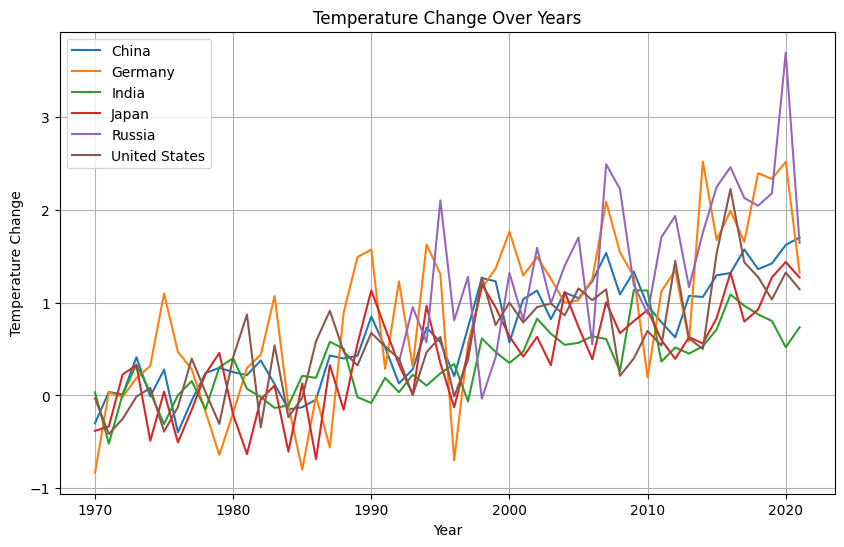

In [40]:
plt.figure(figsize=(10, 6))

# Loop through unique countries and plot temperature change data for each
for country in temp_data['Country'].unique():
    country_data = temp_data[temp_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Temp_change'], label=country)

plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.title('Temperature Change Over Years')
plt.legend()
plt.grid(True)
plt.show()


As we can see as years passed by temperature have increased, showing the raise globally

In [41]:
# Merge the temperature change data into final_data based on 'Country' and 'Year'
final_data = pd.merge(final_data, temp_data, on=['Country', 'Year'], how='left')

# Print the updated final_data DataFrame
final_data.head()

Country  Year  CO2 Emissions  Latitude  Longitude Continent  Population  \
0    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
1  Germany  1970    1084.251361   51.1657    10.4515    Europe    78294590   
2    India  1970     214.497832   20.5937    78.9629      Asia   557501300   
3    Japan  1970     857.089284   36.2048   138.2529      Asia   105416840   
4   Russia  1970    1538.444931   61.5240   105.3188    Europe   130093010   

   Log Population  Temp_change  
0       20.527901       -0.300  
1       18.175989       -0.832  
2       20.138975        0.033  
3       18.473433       -0.381  
4       18.683760          NaN

In [42]:
# Apply log transformation to CO2 Emissions
final_data['Log CO2 Emissions'] = np.log(final_data['CO2 Emissions'])

# Loop through each country and create a scatter plot
for country in final_data['Country'].unique():
    country_data = final_data[final_data['Country'] == country]

    fig = px.scatter(
        country_data,
        x='CO2 Emissions',
        y='Temp_change',
        title=f'Relationship between CO2 Emissions and Temperature Change in {country}',
        labels={'CO2 Emissions': 'CO2 Emissions', 'Temp_change': 'Temperature Change'},
        hover_data=['Year'],
    )

    fig.show()


Hypothesis testing

In [43]:
correlation_data = final_data[['CO2 Emissions', 'Temp_change']].dropna()

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(correlation_data['CO2 Emissions'], correlation_data['Temp_change'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Define significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Correlation Coefficient: 0.18622413747881542
P-value: 0.0014450569975345236
Reject the null hypothesis. There is a significant correlation.


The correlation coefficient between the log-transformed CO2 emissions and temperature change is approximately 0.186, which indicates a relatively weak positive correlation between these two variables. This suggests that, on average, there is a slight tendency for higher CO2 emissions to be associated with slightly higher temperature changes, but the relationship is not very strong.

the results indicate that there is a statistically significant positive correlation between temperature and CO2 emissions. This suggests that as temperatures rise, CO2 emissions tend to increase as well. However, the strength of this correlation is relatively weak (Pearson correlation coefficient of 0.19), meaning that while there is a relationship, it may not be the only factor influencing CO2 emissions.

Observing trend to CO2 emission and Temperature togethe for every choosen country

In [44]:
# Filter data for China
germany_data = final_data[final_data['Country'] == 'Germany']

# Create a dual-axis line plot using Plotly Graph Objects
fig = go.Figure()

# Add CO2 Emissions line
fig.add_trace(go.Scatter(
    x=germany_data['Year'],
    y=germany_data['CO2 Emissions'],
    mode='lines',
    name='CO2 Emissions',
    yaxis='y1'  # Use the primary y-axis
))

# Add Average Temperature line
fig.add_trace(go.Scatter(
    x=germany_data['Year'],
    y=germany_data['Temp_change'],
    mode='lines',
    name='Average Temperature',
    yaxis='y2'  # Use the secondary y-axis
))

# Customize the layout
fig.update_layout(
    title='CO2 Emissions and Temperature Trends in Germany',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions',
    yaxis=dict(title='CO2 Emissions', side='left', color='blue'),
    yaxis2=dict(title='Average Temperature', side='right', overlaying='y', color='red'),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()


In [45]:
# Filter data for China
japan_data = final_data[final_data['Country'] == 'Japan']

# Create a dual-axis line plot using Plotly Graph Objects
fig = go.Figure()

# Add CO2 Emissions line
fig.add_trace(go.Scatter(
    x=japan_data['Year'],
    y=japan_data['CO2 Emissions'],
    mode='lines',
    name='CO2 Emissions',
    yaxis='y1'  # Use the primary y-axis
))

# Add Average Temperature line
fig.add_trace(go.Scatter(
    x=japan_data['Year'],
    y=japan_data['Temp_change'],
    mode='lines',
    name='Average Temperature',
    yaxis='y2'  # Use the secondary y-axis
))

# Customize the layout
fig.update_layout(
    title='CO2 Emissions and Temperature Trends in Japan',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions',
    yaxis=dict(title='CO2 Emissions', side='left', color='blue'),
    yaxis2=dict(title='Average Temperature', side='right', overlaying='y', color='red'),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()


In [46]:
# Filter data for Russia
russia_data = final_data[final_data['Country'] == 'Russia']

# Create a dual-axis line plot using Plotly Graph Objects
fig = go.Figure()

# Add CO2 Emissions line
fig.add_trace(go.Scatter(
    x=russia_data['Year'],
    y=russia_data['CO2 Emissions'],
    mode='lines',
    name='CO2 Emissions',
    yaxis='y1'  # Use the primary y-axis
))

# Add Average Temperature line
fig.add_trace(go.Scatter(
    x=russia_data['Year'],
    y=russia_data['Temp_change'],
    mode='lines',
    name='Average Temperature',
    yaxis='y2'  # Use the secondary y-axis
))

# Customize the layout
fig.update_layout(
    title='CO2 Emissions and Temperature Trends in Russia',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions',
    yaxis=dict(title='CO2 Emissions', side='left', color='blue'),
    yaxis2=dict(title='Average Temperature', side='right', overlaying='y', color='red'),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()


In [47]:
# Filter data for China
china_data = final_data[final_data['Country'] == 'China']

# Create a dual-axis line plot using Plotly Graph Objects
fig = go.Figure()

# Add CO2 Emissions line
fig.add_trace(go.Scatter(
    x=china_data['Year'],
    y=china_data['CO2 Emissions'],
    mode='lines',
    name='CO2 Emissions',
    yaxis='y1'  # Use the primary y-axis
))

# Add Average Temperature line
fig.add_trace(go.Scatter(
    x=china_data['Year'],
    y=china_data['Temp_change'],
    mode='lines',
    name='Average Temperature',
    yaxis='y2'  # Use the secondary y-axis
))

# Customize the layout
fig.update_layout(
    title='CO2 Emissions and Temperature Trends in China',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions',
    yaxis=dict(title='CO2 Emissions', side='left', color='blue'),
    yaxis2=dict(title='Average Temperature', side='right', overlaying='y', color='red'),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()


In [48]:
# Filter data for India
India_data = final_data[final_data['Country'] == 'India']

# Create a dual-axis line plot using Plotly Graph Objects
fig = go.Figure()

# Add CO2 Emissions line
fig.add_trace(go.Scatter(
    x=India_data['Year'],
    y=India_data['CO2 Emissions'],
    mode='lines',
    name='CO2 Emissions',
    yaxis='y1'  # Use the primary y-axis
))

# Add Average Temperature line
fig.add_trace(go.Scatter(
    x=India_data['Year'],
    y=India_data['Temp_change'],
    mode='lines',
    name='Average Temperature',
    yaxis='y2'  # Use the secondary y-axis
))

# Customize the layout
fig.update_layout(
    title='CO2 Emissions and Temperature Trends in India',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions',
    yaxis=dict(title='CO2 Emissions', side='left', color='blue'),
    yaxis2=dict(title='Average Temperature', side='right', overlaying='y', color='red'),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()


In [49]:
# Filter data for us
us_data = final_data[final_data['Country'] == 'United States']

# Create a dual-axis line plot using Plotly Graph Objects
fig = go.Figure()

# Add CO2 Emissions line
fig.add_trace(go.Scatter(
    x=us_data['Year'],
    y=us_data['CO2 Emissions'],
    mode='lines',
    name='CO2 Emissions',
    yaxis='y1'  # Use the primary y-axis
))

# Add Average Temperature line
fig.add_trace(go.Scatter(
    x=us_data['Year'],
    y=us_data['Temp_change'],
    mode='lines',
    name='Average Temperature',
    yaxis='y2'  # Use the secondary y-axis
))

# Customize the layout
fig.update_layout(
    title='CO2 Emissions and Temperature Trends in United States',
    xaxis_title='Year',
    yaxis_title='CO2 Emissions',
    yaxis=dict(title='CO2 Emissions', side='left', color='blue'),
    yaxis2=dict(title='Average Temperature', side='right', overlaying='y', color='red'),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()


# Disaster

In [50]:
#data import
disaster = pd.read_excel('/content/drive/MyDrive/Temperature data for Ireland/emdat_public_2023_08_10_query_uid-QbM9L2.xlsx')
disaster.head()

Year Disaster Group Disaster Subgroup           Disaster Type  \
0  1970  Technological     Technological  Miscellaneous accident   
1  1970  Technological     Technological  Miscellaneous accident   
2  1970        Natural      Hydrological                   Flood   
3  1970        Natural    Meteorological                   Storm   
4  1970  Technological     Technological  Miscellaneous accident   

   Disaster Subtype                     Country Continent  Start Month  \
0              Fire  United Arab Emirates (the)      Asia          5.0   
1          Collapse                   Argentina  Americas          1.0   
2               NaN                   Argentina  Americas          1.0   
3  Tropical cyclone                   Australia   Oceania          1.0   
4             Other                     Belgium    Europe          5.0   

   Total Deaths  No Injured  No Affected  No Homeless  
0          41.0         NaN          NaN          NaN  
1          25.0         NaN          NaN          NaN  
2          36.0         NaN          NaN          NaN  
3          13.0         NaN          NaN          NaN  
4           1.0       160.0          NaN          NaN

Dropping unnecessary columns

In [51]:
# List of columns to drop
columns_to_drop = ['No Injured', 'No Affected', 'No Homeless','Start Month']

# Drop the specified columns
disaster_data = disaster.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
disaster_data.head()


Year Disaster Group Disaster Subgroup           Disaster Type  \
0  1970  Technological     Technological  Miscellaneous accident   
1  1970  Technological     Technological  Miscellaneous accident   
2  1970        Natural      Hydrological                   Flood   
3  1970        Natural    Meteorological                   Storm   
4  1970  Technological     Technological  Miscellaneous accident   

   Disaster Subtype                     Country Continent  Total Deaths  
0              Fire  United Arab Emirates (the)      Asia          41.0  
1          Collapse                   Argentina  Americas          25.0  
2               NaN                   Argentina  Americas          36.0  
3  Tropical cyclone                   Australia   Oceania          13.0  
4             Other                     Belgium    Europe           1.0

**Data preprosessing**

As disaster group column have technological and natural disaster, we will use label encoding to change them into numerical for easier anlysis

In [52]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Disaster Group' column
disaster_data['Disaster Group'] = label_encoder.fit_transform(disaster_data['Disaster Group'])

# Display the updated DataFrame
disaster_data.head()


Year  Disaster Group Disaster Subgroup           Disaster Type  \
0  1970               1     Technological  Miscellaneous accident   
1  1970               1     Technological  Miscellaneous accident   
2  1970               0      Hydrological                   Flood   
3  1970               0    Meteorological                   Storm   
4  1970               1     Technological  Miscellaneous accident   

   Disaster Subtype                     Country Continent  Total Deaths  
0              Fire  United Arab Emirates (the)      Asia          41.0  
1          Collapse                   Argentina  Americas          25.0  
2               NaN                   Argentina  Americas          36.0  
3  Tropical cyclone                   Australia   Oceania          13.0  
4             Other                     Belgium    Europe           1.0

Now, we will find how each year the number of techinological and natural disatser have been changed. WHich will tell us which disasters have been highest every year.

In [53]:
# Group by Year and Disaster Group and calculate the sum
grouped = disaster_data.groupby(['Year', 'Disaster Group']).size().unstack(fill_value=0)

# Rename the columns for better understanding
grouped.columns = ['Technological Disaster Group', 'Natural	Disaster Group']

# Print the grouped data
print(grouped)

# Reset the index for plotting
grouped.reset_index(inplace=True)

# Melt the DataFrame for plotting
melted_grouped = pd.melt(grouped, id_vars='Year', var_name='Disaster Group', value_name='Count')

# Create a bar plot using Plotly Express
fig = px.bar(melted_grouped, x='Year', y='Count', color='Disaster Group', barmode='group',
             title='Sum of Disaster Groups Over the Years', labels={'Count': 'Count', 'Year': 'Year'},
             category_orders={'Disaster Group': ['Technological Disaster Group', 'Natural Disaster Group']})

# Show the plot
fig.show()

      Technological Disaster Group  Natural\tDisaster Group
Year                                                       
1970                            80                       16
1971                            61                       14
1972                            60                       28
1973                            64                       19
1974                            67                       22
1975                            60                       31
1976                            92                       28
1977                           135                       26
1978                           131                       41
1979                           117                       48
1980                           135                       44
1981                           139                       40
1982                           148                       41
1983                           201                       48
1984                           151      

Every year, from 1970-2021 Technological disasters have been higher, which shows from 1970 manmade disasters are greater than natural disaster in all over the populated countries.

Now we will again focus on 6 countries

In [54]:
# List of countries to keep
countries_to_keep = ['China', 'Russian Federation (the)', 'India', 'United States of America (the)', 'Germany', 'Japan']

# Filter the disaster_data DataFrame to keep only the rows with the specified countries
filtered_disaster_data = disaster_data[disaster_data['Country'].isin(countries_to_keep)]

# Reset the index of the filtered DataFrame
filtered_disaster_data.reset_index(drop=True, inplace=True)

# Now 'filtered_disaster_data' will have only the rows with the specified countries
print(filtered_disaster_data)

      Year  Disaster Group Disaster Subgroup       Disaster Type  \
0     1970               0       Geophysical          Earthquake   
1     1970               0    Meteorological               Storm   
2     1970               1     Technological  Transport accident   
3     1970               0       Geophysical          Earthquake   
4     1971               0    Meteorological               Storm   
...    ...             ...               ...                 ...   
5371  2021               0    Climatological            Wildfire   
5372  2021               0    Climatological            Wildfire   
5373  2021               0    Climatological            Wildfire   
5374  2021               0      Hydrological               Flood   
5375  2021               0    Climatological            Wildfire   

      Disaster Subtype                         Country Continent  Total Deaths  
0      Ground movement                           China      Asia       10000.0  
1     Tropical cyclon

In [55]:
final_data.head(10)

Country  Year  CO2 Emissions  Latitude  Longitude      Continent  \
0          China  1970     909.572598   35.8617   104.1954           Asia   
1        Germany  1970    1084.251361   51.1657    10.4515         Europe   
2          India  1970     214.497832   20.5937    78.9629           Asia   
3          Japan  1970     857.089284   36.2048   138.2529           Asia   
4         Russia  1970    1538.444931   61.5240   105.3188         Europe   
5  United States  1970    4693.300240   37.0902   -95.7129  North America   
6          China  1971     913.439385   35.8617   104.1954           Asia   
7        Germany  1971    1078.567837   51.1657    10.4515         Europe   
8          India  1971     215.520618   20.5937    78.9629           Asia   
9          Japan  1971     854.232595   36.2048   138.2529           Asia   

   Population  Log Population  Temp_change  Log CO2 Emissions  
0   822534460       20.527901       -0.300           6.812975  
1    78294590       18.175989       -0.832           6.988645  
2   557501300       20.138975        0.033           5.368300  
3   105416840       18.473433       -0.381           6.753542  
4   130093010       18.683760          NaN           7.338527  
5   200328340       19.115468       -0.030           8.453891  
6   843285440       20.552816        0.037           6.817217  
7    78511410       18.178755        0.032           6.983389  
8   569999170       20.161145       -0.519           5.373057  
9   106789360       18.486369       -0.334           6.750204

When datasets were joined, few countries from disaster were not added, as the countries name were different here. Hence we will rename countries and add them in final data again.

In [56]:
filtered_disaster_data['Country'].unique()

array(['China', 'India', 'Japan', 'United States of America (the)',
       'Germany', 'Russian Federation (the)'], dtype=object)

In [57]:
# Define a dictionary to map old country names to new ones
country_name_mapping = {
    'United States of America (the)': 'United States',
    'Russian Federation (the)': 'Russia',
    # Add more mappings as needed
}

# Replace the old country names with the new ones
filtered_disaster_data['Country'] = filtered_disaster_data['Country'].replace(country_name_mapping)

# Print the unique country names to verify the changes
filtered_disaster_data.head()

<ipython-input-57-614da83c8a76>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year  Disaster Group Disaster Subgroup       Disaster Type  \
0  1970               0       Geophysical          Earthquake   
1  1970               0    Meteorological               Storm   
2  1970               1     Technological  Transport accident   
3  1970               0       Geophysical          Earthquake   
4  1971               0    Meteorological               Storm   

   Disaster Subtype Country Continent  Total Deaths  
0   Ground movement   China      Asia       10000.0  
1  Tropical cyclone   China      Asia         107.0  
2             Water   China      Asia         300.0  
3   Ground movement   India      Asia          26.0  
4  Tropical cyclone   India      Asia        9658.0

In [58]:
# List of columns to drop
columns_to_drop = ['Continent']

# Drop the specified columns
filtered_disaster_data = filtered_disaster_data.drop(columns=columns_to_drop, axis=1)

# Merge the two DataFrames on 'Country' and 'Year'
final_data = final_data.merge(filtered_disaster_data, on=['Country', 'Year'], how='left')

# Print the merged data to verify the results
final_data.head()


Country  Year  CO2 Emissions  Latitude  Longitude Continent  Population  \
0    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
1    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
2    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
3  Germany  1970    1084.251361   51.1657    10.4515    Europe    78294590   
4    India  1970     214.497832   20.5937    78.9629      Asia   557501300   

   Log Population  Temp_change  Log CO2 Emissions  Disaster Group  \
0       20.527901       -0.300           6.812975             0.0   
1       20.527901       -0.300           6.812975             0.0   
2       20.527901       -0.300           6.812975             1.0   
3       18.175989       -0.832           6.988645             NaN   
4       20.138975        0.033           5.368300             0.0   

  Disaster Subgroup       Disaster Type  Disaster Subtype  Total Deaths  
0       Geophysical          Earthquake   Ground movement       10000.0  
1    Meteorological               Storm  Tropical cyclone         107.0  
2     Technological  Transport accident             Water         300.0  
3               NaN                 NaN               NaN           NaN  
4       Geophysical          Earthquake   Ground movement          26.0

In [59]:
# Drop duplicates from final_data
final_data = final_data.drop_duplicates()

# Print the DataFrame without duplicates to verify the results
final_data.head()


Country  Year  CO2 Emissions  Latitude  Longitude Continent  Population  \
0    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
1    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
2    China  1970     909.572598   35.8617   104.1954      Asia   822534460   
3  Germany  1970    1084.251361   51.1657    10.4515    Europe    78294590   
4    India  1970     214.497832   20.5937    78.9629      Asia   557501300   

   Log Population  Temp_change  Log CO2 Emissions  Disaster Group  \
0       20.527901       -0.300           6.812975             0.0   
1       20.527901       -0.300           6.812975             0.0   
2       20.527901       -0.300           6.812975             1.0   
3       18.175989       -0.832           6.988645             NaN   
4       20.138975        0.033           5.368300             0.0   

  Disaster Subgroup       Disaster Type  Disaster Subtype  Total Deaths  
0       Geophysical          Earthquake   Ground movement       10000.0  
1    Meteorological               Storm  Tropical cyclone         107.0  
2     Technological  Transport accident             Water         300.0  
3               NaN                 NaN               NaN           NaN  
4       Geophysical          Earthquake   Ground movement          26.0

Now we will do some countrywise analysis.
First we will see countrywise population, CO2 emission and total deaths for every country for all years togeter.

And later we will see Correlation between CO2 Emissions and Total Deaths

In [60]:
# Calculate total CO2 emissions, population, and total deaths for each country
country_summary = final_data.groupby('Country').agg({
    'Log CO2 Emissions': 'sum',
    'Population': 'max',
    'Total Deaths': 'sum'
}).reset_index()

# Analyze the relationship between CO2 emissions and total deaths
co2_vs_deaths = final_data.groupby('Country').agg({
    'Log CO2 Emissions': 'sum',
    'Total Deaths': 'sum'
}).reset_index()

# Calculate correlation between CO2 emissions and total deaths
correlation = co2_vs_deaths['Log CO2 Emissions'].corr(co2_vs_deaths['Total Deaths'])

# Print the results
print("Country-wise Analysis:")
print("\nTotal CO2 Emissions, Population, and Total Deaths for Each Country:")
print(country_summary)

print(f"Correlation between CO2 Emissions and Total Deaths: {correlation}")


Country-wise Analysis:

Total CO2 Emissions, Population, and Total Deaths for Each Country:
         Country  Log CO2 Emissions  Population  Total Deaths
0          China       14326.844683  1425893500      487705.0
1        Germany         909.659811    83408560       10383.0
2          India        9445.725830  1407563900      237767.0
3          Japan        2216.017100   128117040       34256.0
4         Russia        2914.466096   148897280       68056.0
5  United States        8541.194738   336997630       24357.0
Correlation between CO2 Emissions and Total Deaths: 0.8570323950787327


we dove into the numbers for different countries, looking at their CO2 emissions, populations, and total deaths. Here's what we found:

China, with a whopping 1.43 billion people, pumped out a crazy high CO2 emission score of 14326.84 and unfortunately, had 487705 total deaths.

Now, Germany, home to about 83.4 million folks, had a way lower CO2 score of 909.66 and 10383 total deaths.

India, the land of around 1.41 billion, hit a CO2 emission score of 9445.73 and saw 237767 total deaths.

Jumping to Japan, with 128.1 million residents, their CO2 emission score was 2216.02 and they faced 34256 total deaths.

Russia, with a population of 148.9 million, had a CO2 emission score of 2914.47 and a whopping 68056 total deaths.

The United States, counting around 337 million people, racked up a CO2 emission score of 8541.19 and counted 24357 total deaths.

Now, here's the eye-opener: when we looked at the connection between CO2 emissions and total deaths, we saw a big positive link with a correlation of 0.857. In plain words, the more CO2, the more unfortunate loss of lives. It's like a red flag waving at us to take action and make some changes.

So, these numbers are basically saying that we need to think seriously about how we're treating our planet and come up with some smart solutions. It's time to step up and do right by our world and the people living in it.

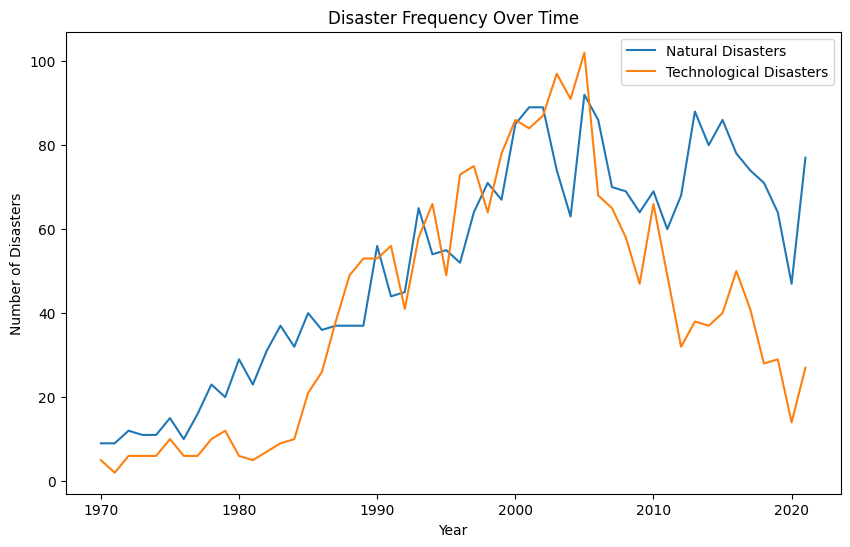

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate data into natural and technological disasters
natural_disasters = final_data[final_data['Disaster Group'] == 0]
technological_disasters = final_data[final_data['Disaster Group'] == 1]

# Group by Year and calculate frequency for natural and technological disasters
natural_disasters_grouped = natural_disasters.groupby('Year')['Disaster Group'].count()
technological_disasters_grouped = technological_disasters.groupby('Year')['Disaster Group'].count()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(natural_disasters_grouped.index, natural_disasters_grouped, label='Natural Disasters')
plt.plot(technological_disasters_grouped.index, technological_disasters_grouped, label='Technological Disasters')

plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Disaster Frequency Over Time')
plt.legend()

plt.show()


In general Technological disaster is at peak.

In [62]:
# Create a new column 'Disaster Category' based on 'Disaster Group'
final_data['Disaster Category'] = final_data['Disaster Group'].apply(lambda x: 'Natural' if x == 0 else 'Technological')

# Group data by 'Country' and 'Disaster Category' and calculate counts
grouped_data = final_data.groupby(['Country', 'Disaster Category']).agg(
    {'Disaster Group': 'count', 'Population': 'max'}).reset_index()

# Pivot the data to create a table with 'Country' as rows and 'Disaster Category' as columns
pivot_table = pd.pivot_table(grouped_data, values='Disaster Group',
                             index='Country', columns='Disaster Category', aggfunc='sum', fill_value=0)

# Add a 'Total' column to the pivot_table
pivot_table['Total'] = pivot_table['Natural'] + pivot_table['Technological']

# Merge the pivot_table with the original population data
result_table = pivot_table.merge(grouped_data.groupby('Country')['Population'].max(), left_index=True, right_index=True)

# Rename columns for clarity
result_table.rename(columns={'Population': 'Population', 'Natural': 'Natural Disasters', 'Technological': 'Technological Disasters'}, inplace=True)

# Display the result table
print(result_table)


               Natural Disasters  Technological Disasters  Total  Population
Country                                                                     
China                        814                      858   1672  1425893500
Germany                       82                       31    113    83408560
India                        648                      721   1369  1407563900
Japan                        257                       57    314   128117040
Russia                       147                      222    369   148897280
United States                743                      253    996   336997630


We're looking at some numbers related to natural disasters, technological disasters, and the population of different countries. Let's break it down:

**China**: They've experienced 814 natural disasters and 858 technological disasters, making a total of 1672. With a whopping population of 1.42 billion, that's a lot to manage!

**Germany**: On the other hand, Germany faced 82 natural disasters and 31 technological ones, summing up to 113. Their population is around 83.4 million.

**India**: India saw 648 natural disasters and 721 technological disasters, adding up to 1369. And they've got a massive population of 1.41 billion.

**Japan**: Japan encountered 257 natural disasters and 57 technological ones, making it 314 in total. Their population is around 128.1 million.

**Russia**: Russia experienced 147 natural disasters and 222 technological disasters, coming to 369. Their population is about 148.9 million.

**United States**: The US faced 743 natural disasters and 253 technological disasters, totaling 996. With a population of around 337 million, that's quite a bit to handle.

These numbers paint a picture of how different countries are dealing with the aftermath of various types of disasters, whether they're natural or technological. It's clear that both the number of disasters and the population play a role in the challenge.

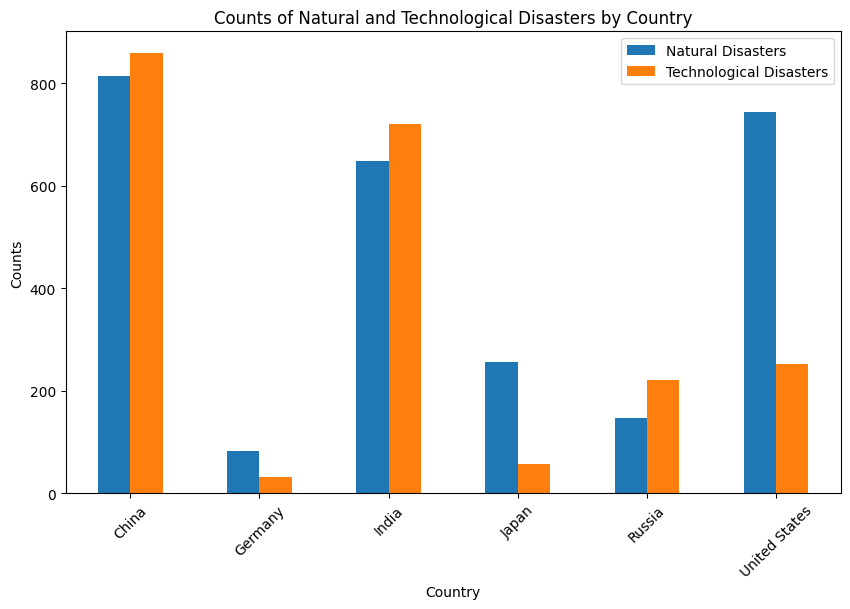

In [63]:
# Plotting
result_table.plot(kind='bar', y=['Natural Disasters', 'Technological Disasters'], figsize=(10, 6))
plt.title('Counts of Natural and Technological Disasters by Country')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()


As Germany, Japan and United states, have higher no of Natural disaster, we will see in which subcategory, they have the highest disasters.

In [64]:
# Create a new column 'Disaster Category' based on 'Disaster Group'
final_data['Disaster Category'] = final_data['Disaster Group'].apply(lambda x: 'Natural' if x == 0 else 'Technological')

# Filter data for United States and Japan
us_data = final_data[final_data['Country'] == 'United States']
japan_data = final_data[final_data['Country'] == 'Japan']
germany_data = final_data[final_data['Country'] == 'Germany']

# Group data by 'Country', 'Disaster Subtype', and 'Disaster Category' and calculate counts
us_grouped = us_data.groupby(['Country', 'Disaster Subtype', 'Disaster Category']).size().unstack(fill_value=0)
japan_grouped = japan_data.groupby(['Country', 'Disaster Subtype', 'Disaster Category']).size().unstack(fill_value=0)
germany_grouped = germany_data.groupby(['Country', 'Disaster Subtype', 'Disaster Category']).size().unstack(fill_value=0)

# Sort the counts in descending order
us_grouped = us_grouped.sort_values(by='Natural', ascending=False)
japan_grouped = japan_grouped.sort_values(by='Natural', ascending=False)
germany_grouped = germany_grouped.sort_values(by='Natural', ascending=False)

print("United States:")
print(us_grouped)
print("\nJapan:")
print(japan_grouped)
print("\nGermany:")
print(germany_grouped)


United States:
Disaster Category                               Natural  Technological
Country       Disaster Subtype                                        
United States Convective storm                      255              0
              Tropical cyclone                       98              0
              Riverine flood                         81              0
              Forest fire                            37              0
              Ground movement                        26              0
              Flash flood                            24              0
              Heat wave                              20              0
              Land fire (Brush, Bush, Pasture)       15              0
              Drought                                14              0
              Cold wave                               7              0
              Viral disease                           3              0
              Mudslide                                3       

Clearly, we can see in
* united states Convective storm natural disaster have highest no with 255.
* Japan has highest count in Tropical cyclone with 93
* Germany also have highest count in convective storm with 18 count.

To support our findings below are some research articles:

**Reaserch Article about United states**

https://www.nature.com/articles/s43247-022-00409-6

Flash floods are largely driven by high rainfall rates in convective storms that are projected to increase in frequency and intensity in a warmer climate in the future. However, quantifying the changes in future flood flashiness is challenging due to the lack of high-resolution climate simulations. Here we use outputs from a continental convective-permitting numerical weather model at 4-km and hourly resolution and force a numerical hydrologic model at a continental scale to depict such change. As results indicate, US floods are becoming 7.9% flashier by the end of the century assuming a high-emissions scenario. The Southwest (+10.5%) has the greatest increase in flashiness among historical flash flood hot spots, and the central US (+8.6%) is emerging as a new flash flood hot spot. Additionally, future flash flood-prone frontiers are advancing northwards. This study calls on implementing climate-resilient mitigation measures for emerging flash flood hot spots.

**Reaserch Article about Japan**

https://www.jstage.jst.go.jp/article/jmsj/98/4/98_2020-039/_html/-char/en

Based on observations, the number of tropical cyclones (TCs) approaching the southern coast of Japan, including Tokyo, has increased over the last 40 years, and these TCs are increasing in strength when they approach land. The environmental conditions for TC development have become more favorable, with warmer sea surface temperature, less vertical wind shear, and more moisture in the atmosphere. In addition, the translation speed of TCs has decreased, which indicates a longer influence time. Comparison of the synoptic environment during July–October between the first (1980–1999, P1) and second (2000–2019, P2) 20 years shows that the sub-tropical high is strengthened in P2, where the western and northern edge of the high extends further into the west and north, respectively. Also, the westerly jet is weakened in P2 over and south of Japan in the middle-to-upper troposphere. These changes in the synoptic environment are considered to play a role in the increase in the number of TCs approaching Tokyo and also in the creation of more favorable conditions for TC development. The relationship between the changes in TC characteristics over the last 40 years and global warming is unclear. As the Pacific Decadal Oscillation is in a positive phase in P1 and in a negative phase in many years of P2, decadal oscillations may have played some role in the increase in the number of approaching TCs and in the changes in the synoptic environment.

**Research article about Germany**

https://rmets.onlinelibrary.wiley.com/doi/full/10.1002/wea.3886

Between 10 and 12 June 2019, a series of severe convective storms (SCSs) affected large parts of Germany, particularly the southern and eastern parts of the country. Hail with diameters of up to 6cm, wind gusts reaching gale, and occasionally even hurricane force, as well as heavy rain with daily totals up to 100mm entailed considerable damage to buildings, vehicles, infrastructure and agriculture.

In [65]:
# Filter the data for countries of interest (China, India, Russia) and technological disasters
countries_of_interest = ['China', 'India', 'Russia']
technological_disasters = final_data[
    (final_data['Country'].isin(countries_of_interest)) &
    (final_data['Disaster Group'] == 1)  # Technological disasters
]

# Group data by 'Country' and 'Disaster Subtype' and calculate counts
grouped_subtype_data = technological_disasters.groupby(['Country', 'Disaster Subtype']).agg({'Disaster Group': 'count'}).reset_index()

# Pivot the data to create a table with 'Country' as rows and 'Disaster Subtype' as columns
pivot_subtype_table = pd.pivot_table(grouped_subtype_data, values='Disaster Group',
                                     index='Country', columns='Disaster Subtype', aggfunc='sum', fill_value=0)

# Display the result table
pivot_subtype_table.head()


Disaster Subtype  Air  Chemical spill  Collapse  Explosion  Fire  Gas leak  \
Country                                                                      
China              20               8        71        316    97        17   
India              24               1        60         46    71         5   
Russia             69               4         7         34    39         3   

Disaster Subtype  Other  Poisoning  Radiation  Rail  Road  Water  
Country                                                           
China                80         11          2    24   134     78  
India                45         14          0   122   246     87  
Russia                8          2          0     8    26     22

As china, India and Russia have highest population, CO2 emission and temp, they also have highest disaster in technological type.

* China have highest no of technological disaster in explosion type.
* India have highest no of disaster in Road subtype.
* Russia have highest no of air disasters.

To support our findings below are some rletaed reaserch articles:

**China news article**

https://www.bbc.com/news/world-asia-china-33844084

Two massive explosions in the port of Tianjin, northern China, have killed more than a hundred people, left hundreds more injured and devastated large areas of the city.They took place at a warehouse at the port which contained hazardous and flammable chemicals, including calcium carbide, sodium cyanide, potassium nitrate, ammonium nitrate and sodium nitrate.

**India reserch article**

https://www.sciencedirect.com/science/article/pii/S2352146517305896

Traffic congestion on roads not only increases the fuel consumption but consequently leads to increase in carbon dioxide emissions, outdoor air pollution as well as increase in the exposure time of the passengers. We analyse the greenhouse gas emissions for road transport sector in Mumbai Metropolitan Region (MMR) using fuel consumption and the vehicle kilometre travelled methods. In addition, by conducting traffic survey on four major roads in MMR, the congestion factor was established to estimate the share of greenhouse gas emissions from the road transport sector that can be attributed to traffic congestion.

**Russia reserach article**

https://www.lehman.edu/faculty/rwhittaker/Day02-Research/Russia_%20Environmental%20Issues.pdf

Air pollution is a significant problem in several major Russian cities, including Moscow and St. Petersburg, but also in some smaller cities, where industrial facilities are under less scrutiny for environmental compliance. Russia's air quality standards remain below US and European norms, although Russia's are becoming stricter as
environmental awareness grows.

Hypothesis testing

In [66]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming data is your DataFrame

# Create a contingency table of disaster type and population
contingency_table = pd.crosstab(final_data['Disaster Group'], final_data['Population'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square statistic: 859.6364253464476
P-value: 1.0866080611105496e-63


**Null Hypothesis (H0):** There is no association between disaster type and population. In other words, the proportion of natural and technological disasters is the same regardless of population levels.

**Alternative Hypothesis (Ha):** There is an association between disaster type and population. The proportion of natural and technological disasters is different across different population levels

The chi-square test results indicate that there is a significant relationship between disaster type and population. The p-value (1.0866080611105496e-63) is extremely small, much smaller than a typical significance level (e.g., 0.05), which indicates strong evidence against the null hypothesis. Therefore, you can conclude that the disaster type is indeed affected by population.

# Future scope


For further study, we can build a machine learning model to predict the future values. By those predictions we can take actions to reduce the count as possible as we can to save earth and to save ourseleves!